# 3. Cinemática do Corpo Rígido
Professor Paulo Victor <br>
E-mail: paulo.gomes@cefet-rj.br <br>
CEFET-RJ Campus Angra dos Reis Sala 17C

---
**Atenção:**

Este material serve apenas como um guia para estudos e para as aulas, não substituindo a leitura dos livros indicados e é de uso exclusivo dos alunos do CEFET/RJ campus Angra dos Reis.

---

## 3.1 Introdução
* Tudo o que vimos em **Cinemática da Partícula** também vale para a **Cinemática de Corpos Rígidos**.
    - Queremos obter a posição, velocidade e aceleração de pontos pertencentes ao corpo
* Além disso, queremos também obter a orientação, velocidade angular e aceleração angular do corpo

**Corpo Rígido x Corpo Flexível**

Para analisar a cinemática de um corpo rígido, devemos criar um sistema de referência móvel associado ao corpo objeto de estudo. Através desse referencial móvel, poderemos estudar a mudança de orientação, a velocidade angular e a aceleração angular do corpo. 

In [1]:
from IPython.display import Image

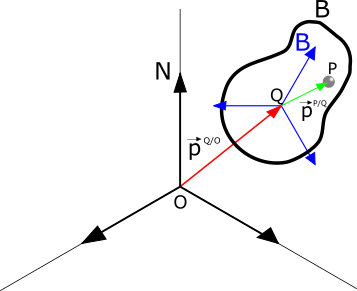

In [2]:
Image('batata02.png',width=450)

**Observação:**

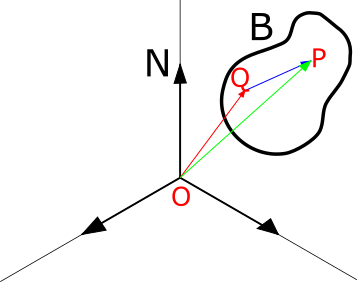

In [3]:
Image('batata06.png',width=450)

${}^N \vec{v}{}^{P} = {}^{N}\vec{v}{}^Q + {}^{N}\vec{\omega}{}^{B} \times \vec{p}^{P/Q}$

## Tipos de movimento

#### Rotação Pura:

O corpo possui um ponto (centro de rotação) que não apresenta movimento com relação à estrutura estacionária de referência (sistema de referência inercial). Todos os outros pontos do corpo descrevem arcos ao redor daquele centro. Uma linha de referência desenhada no corpo através do centro muda somente a orientação angular

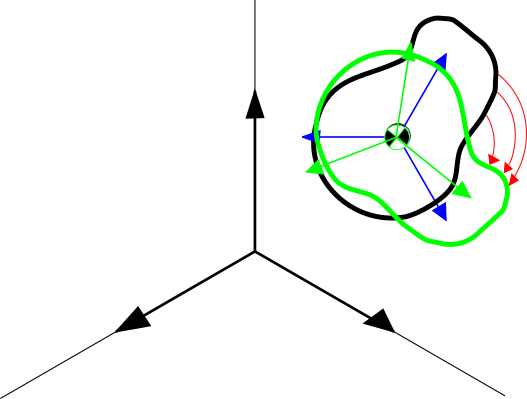

In [4]:
Image('rotação_pura.png',width=450)

#### Translação Pura:

Todos os pontos do corpo descrevem caminhos paralelos (curvilíneos ou retilíneos). A linha de referência desenhada no corpo muda de posição linear, mas não muda a orientação angular.

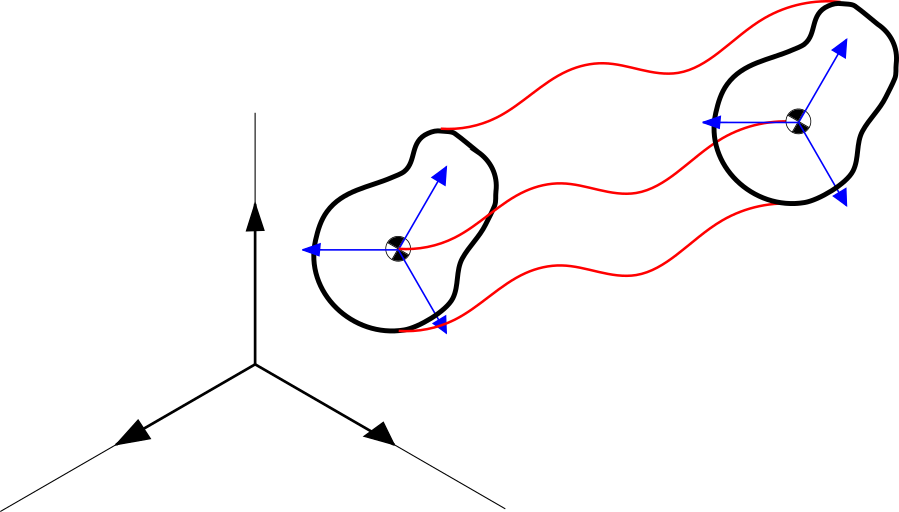

In [5]:
Image('translação_pura.png',width=600)

#### Movimento Complexo: 

Uma combinação simultânea de rotação e translação. Qualquer linha de referência desenhada no corpo mudará a posição linear e a orientação angular. Pontos no corpo terão caminhos não paralelos e haverá, a cada instante, um centro de rotação que mudará de localização constantemente. 

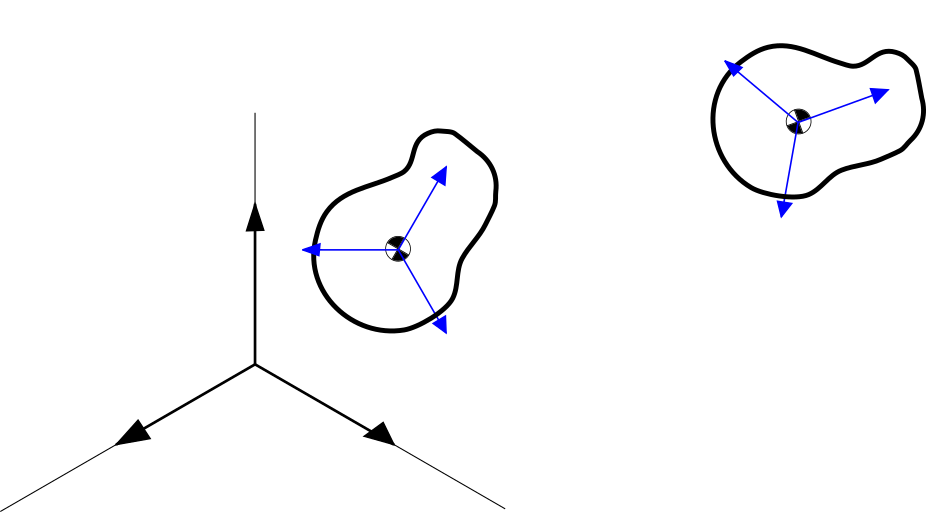

In [6]:
Image('movimento_complexo.png',width=600)

## 3.2 Ângulos de Euler

Podemos representar qualquer orientação de um corpo rígido através de 3 rotações sucessivas. 

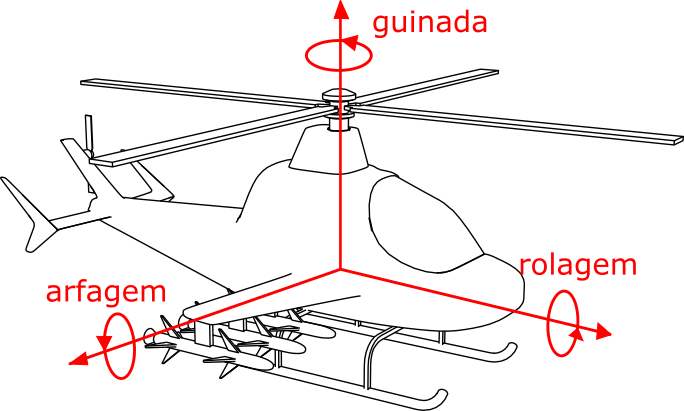

In [7]:
Image('helicoptero-Euler-angs.png',width=700)

In [8]:
from IPython.display import Video

In [9]:
Video('Helicoptero-Euler-Angs.m4v',width=700)

### Exemplo 1: 
Obtenha a orientação, velocidade angular e a aceleração angular do helicóptero. 

In [10]:
import sympy as sy
import sympy.physics.mechanics as me

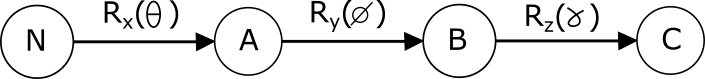

In [11]:
Image('angs_euler.png',width=800)

In [12]:
theta,phi,gamma = me.dynamicsymbols('theta phi gamma')

In [13]:
N = me.ReferenceFrame('N')
A = me.ReferenceFrame('A')
B = me.ReferenceFrame('B')
C = me.ReferenceFrame('C')

In [14]:
A.orient(N,'Axis',[theta,N.x])
B.orient(A,'Axis',[phi,A.y])
C.orient(B,'Axis',[gamma,B.z])

**Orientação**

In [15]:
C.dcm(N)

Matrix([
[ cos(gamma(t))*cos(phi(t)),  sin(gamma(t))*cos(theta(t)) + sin(phi(t))*sin(theta(t))*cos(gamma(t)), sin(gamma(t))*sin(theta(t)) - sin(phi(t))*cos(gamma(t))*cos(theta(t))],
[-sin(gamma(t))*cos(phi(t)), -sin(gamma(t))*sin(phi(t))*sin(theta(t)) + cos(gamma(t))*cos(theta(t)), sin(gamma(t))*sin(phi(t))*cos(theta(t)) + sin(theta(t))*cos(gamma(t))],
[               sin(phi(t)),                                             -sin(theta(t))*cos(phi(t)),                                             cos(phi(t))*cos(theta(t))]])

**Velocidade Angular**

In [16]:
C.ang_vel_in(N)

Derivative(theta(t), t)*N.x + Derivative(phi(t), t)*A.y + Derivative(gamma(t), t)*B.z

**Aceleração Angular**

In [17]:
C.ang_acc_in(N)

Derivative(theta(t), (t, 2))*N.x + Derivative(phi(t), (t, 2))*A.y + Derivative(phi(t), t)*Derivative(theta(t), t)*A.z + Derivative(gamma(t), t)*Derivative(phi(t), t)*B.x - cos(phi(t))*Derivative(gamma(t), t)*Derivative(theta(t), t)*B.y + Derivative(gamma(t), (t, 2))*B.z

Queremos agora obter a velocidade e a aceleração do bico do helicóptero em relação ao referencial inercial. Vamos supor que a distância do bico ao centro de massa seja $L$.

In [18]:
x,y,z = me.dynamicsymbols('x y z')
L = sy.symbols('L')

In [19]:
O = me.Point('O')
O.set_vel(N,0)

In [20]:
P = me.Point('P')
pCO_O = x*N.x + y*N.y + z*N.z 
pPO = pCO_O + L*C.y
P.set_pos(O,pPO)
P.set_vel(N,pPO.dt(N))

In [21]:
P.vel(N)

Derivative(x(t), t)*N.x + Derivative(y(t), t)*N.y + Derivative(z(t), t)*N.z - L*(sin(phi(t))*Derivative(theta(t), t) + Derivative(gamma(t), t))*C.x + L*(sin(gamma(t))*Derivative(phi(t), t) + cos(gamma(t))*cos(phi(t))*Derivative(theta(t), t))*C.z

In [22]:
P.acc(N)

Derivative(x(t), (t, 2))*N.x + Derivative(y(t), (t, 2))*N.y + Derivative(z(t), (t, 2))*N.z + (L*(sin(gamma(t))*Derivative(phi(t), t) + cos(gamma(t))*cos(phi(t))*Derivative(theta(t), t))*(-sin(gamma(t))*cos(phi(t))*Derivative(theta(t), t) + cos(gamma(t))*Derivative(phi(t), t)) - L*(sin(phi(t))*Derivative(theta(t), (t, 2)) + cos(phi(t))*Derivative(phi(t), t)*Derivative(theta(t), t) + Derivative(gamma(t), (t, 2))))*C.x + (-L*(sin(gamma(t))*Derivative(phi(t), t) + cos(gamma(t))*cos(phi(t))*Derivative(theta(t), t))**2 - L*(sin(phi(t))*Derivative(theta(t), t) + Derivative(gamma(t), t))**2)*C.y + (L*(sin(phi(t))*Derivative(theta(t), t) + Derivative(gamma(t), t))*(-sin(gamma(t))*cos(phi(t))*Derivative(theta(t), t) + cos(gamma(t))*Derivative(phi(t), t)) + L*(-sin(gamma(t))*cos(phi(t))*Derivative(gamma(t), t)*Derivative(theta(t), t) + sin(gamma(t))*Derivative(phi(t), (t, 2)) - sin(phi(t))*cos(gamma(t))*Derivative(phi(t), t)*Derivative(theta(t), t) + cos(gamma(t))*cos(phi(t))*Derivative(theta(t),

## 3.3 Restrições Cinemáticas

Em sistemas mecânicos, frequentemente os corpos (**elos**) do sistema são restringidos a se moverem de alguma forma específica para um dado fim. <br>
Chamamos o conjunto de **elos** do sistema mecânico de **cadeia cinemática**. Basicamente podemos ter:
* Cadeia cinemática aberta
* Cadeia cinemática fechada

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTPEwD5jd0h3y0qYiG5gw-456UmpzFMFq-odg&usqp=CAU)

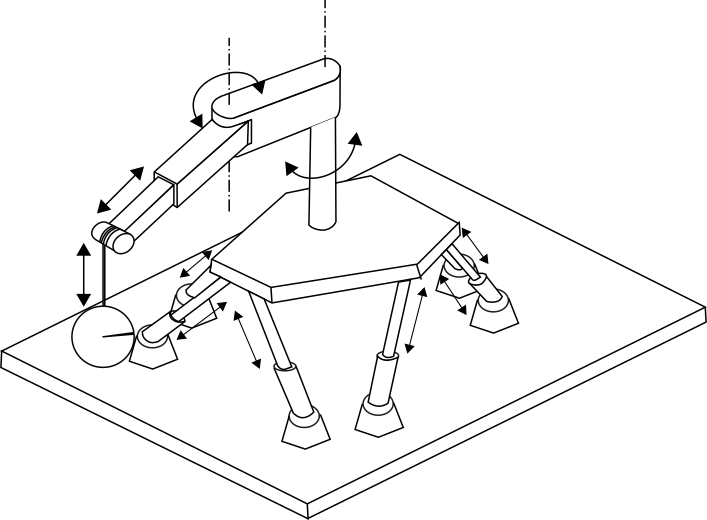

In [23]:
Image('robo-pv.png',width=600)

In [24]:
Video('Dinamica Do Hibrido-1.m4v',width=700)

### 3.3.1 Condição de não deslizamento

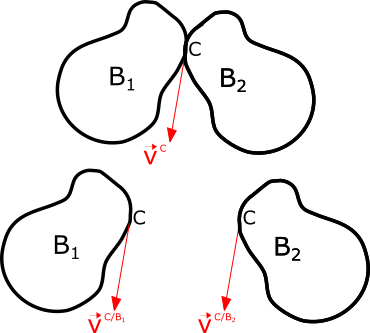

In [25]:
Image('batata03.png',width=500)

$\vec{v}{}^{C/B_{1}} = \vec{v}{}^{C/B_{2}}$

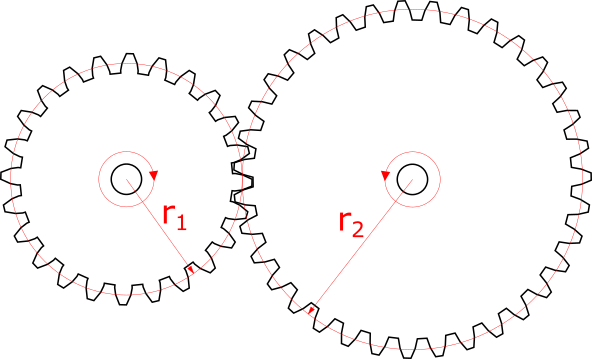

In [26]:
Image('engrenagens.png',width=600)

### Exemplo 2:

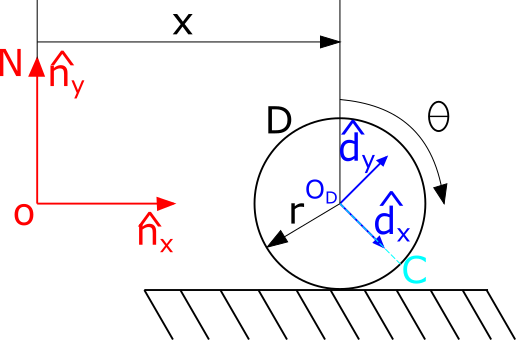

In [27]:
Image('disco1.png',width=600)

In [28]:
theta,x = me.dynamicsymbols('theta x')
r = sy.symbols('r')

In [29]:
N = me.ReferenceFrame('N')
D = me.ReferenceFrame('D')

In [30]:
D.orient(N,'Axis',[-theta,N.z])

In [31]:
D.ang_vel_in(N)

- Derivative(theta(t), t)*N.z

In [32]:
D.ang_acc_in(N)

- Derivative(theta(t), (t, 2))*N.z

In [33]:
pOdO = x*N.x
pCOd = r*D.x

In [34]:
pCO = pOdO + pCOd
pCO

x(t)*N.x + r*D.x

In [35]:
velC = pCO.dt(N)
velC

Derivative(x(t), t)*N.x - r*Derivative(theta(t), t)*D.y

Quando $C$ é o ponto de contato do disco com o chão:
$\hat{\mathbf{d}}_y = \hat{\mathbf{n}}_x$

$\theta = \dfrac{\pi}{2}$

Neste instante de tempo, temos que:

${}^{N}\vec{v} {}^{C} = \vec{0}$

In [36]:
velC.express(N)

(-r*sin(theta(t))*Derivative(theta(t), t) + Derivative(x(t), t))*N.x - r*cos(theta(t))*Derivative(theta(t), t)*N.y

In [37]:
dic = {theta:sy.pi/2}
Eq = me.msubs(velC.express(N),dic)
Eq

(-r*Derivative(theta(t), t) + Derivative(x(t), t))*N.x

In [38]:
Eqx = sy.Eq(Eq.dot(N.x),0)
Eqx

Eq(-r*Derivative(theta(t), t) + Derivative(x(t), t), 0)

In [39]:
xsol = sy.solve(Eqx,x.diff())[0]
xsol

r*Derivative(theta(t), t)

In [40]:
sy.Eq(x.diff(),xsol)

Eq(Derivative(x(t), t), r*Derivative(theta(t), t))

### 3.3.2 Equações de Restrições Cinemáticas ou Equações de Vínculos

A determinação da configuração do sistema pode ser feita através de um conjunto de funções escalares do tempo, $q_1(t)$, $q_2(t)$, ..., $q_n(t)$, denominadas **coordenadas generalizadas** ou, simplesmente, coordenadas do sistema.
* O número de coordenadas generalizadas mutuamente independentes de um sistema mecânico é conhecido como **número de graus de liberdade** do sistema.  

$f(q_1,q_2,...,q_n,\dot{q}_1,\dot{q}_2,...,\dot{q}_n,t) = 0$

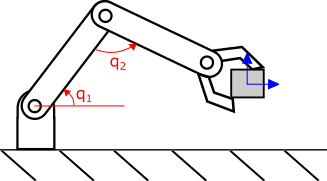

In [41]:
Image('robo1.png',width=600)

2 coordenadas generalizadas independentes

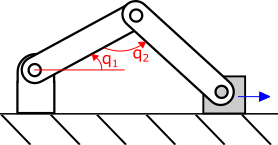

In [42]:
Image('robo2.png',width=600)

1 coordenada generalizada independente

### Exemplo 3:

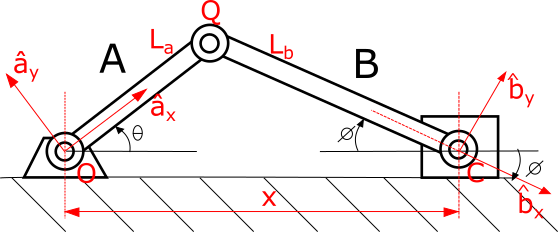

In [43]:
Image('biela-manivela2.png',width=700)

${}^{N}\vec{\omega}{}^{A} = \dot{\theta} \hat{\mathbf{n}}_z \qquad {}^{N}\vec{\omega}{}^{B} = -\dot{\phi} \hat{\mathbf{n}}_z$

Obter $\dot{\phi}(t)$:

In [44]:
theta,phi = me.dynamicsymbols('theta phi')
t = me.dynamicsymbols._t

In [45]:
la,lb = sy.symbols('la lb')

In [46]:
N = me.ReferenceFrame('N')
A = me.ReferenceFrame('A')
B = me.ReferenceFrame('B')

In [47]:
A.orient(N,'Axis',[theta,N.z])
B.orient(N,'Axis',[- phi,N.z])

In [48]:
O = me.Point('O')
O.set_vel(N,0)

In [49]:
Q = me.Point('Q')
pQO = la*A.x
Q.set_pos(O,pQO)
Q.set_vel(N,pQO.dt(N))

In [50]:
C = me.Point('C')
pCQ = lb*B.x
pCO = pQO + pCQ
C.set_pos(O, pCO)
C.set_vel(N,pCO.dt(N))
C.vel(N)

la*Derivative(theta(t), t)*A.y - lb*Derivative(phi(t), t)*B.y

In [51]:
x = me.dynamicsymbols('x')
Eq1 = (la*A.x + lb*B.x) - x*N.x
Eq1.express(N)

(la*cos(theta(t)) + lb*cos(phi(t)) - x(t))*N.x + (la*sin(theta(t)) - lb*sin(phi(t)))*N.y

In [52]:
phi_sol = sy.solve(Eq1.dot(N.y),phi)
phi_sol

[pi - asin(la*sin(theta(t))/lb), asin(la*sin(theta(t))/lb)]

In [53]:
phi_sol = sy.solve(Eq1.dot(N.y),phi)[1]
phi_sol

asin(la*sin(theta(t))/lb)

In [54]:
phi_ponto_sol = phi_sol.diff(t)
phi_ponto_sol

la*cos(theta(t))*Derivative(theta(t), t)/(lb*sqrt(-la**2*sin(theta(t))**2/lb**2 + 1))

Outra maneira de obter $\dot{\phi}$

In [55]:
EqR = sy.Eq(C.vel(N).dot(N.y),0)
EqR

Eq(la*cos(theta(t))*Derivative(theta(t), t) - lb*cos(phi(t))*Derivative(phi(t), t), 0)

In [56]:
phi_ponto = phi.diff(t)
sol_phi_ponto = sy.solve(EqR,phi_ponto)[0]
sol_phi_ponto

la*cos(theta(t))*Derivative(theta(t), t)/(lb*cos(phi(t)))

In [57]:
sol_phi_ponto.subs(phi,phi_sol)

la*cos(theta(t))*Derivative(theta(t), t)/(lb*sqrt(-la**2*sin(theta(t))**2/lb**2 + 1))

Solução de $x$ em função de $\theta$:

In [58]:
C.pos_from(O).express(N)

(la*cos(theta(t)) + lb*cos(phi(t)))*N.x + (la*sin(theta(t)) - lb*sin(phi(t)))*N.y

In [59]:
x_sol = ((C.pos_from(O)).express(N)).subs(phi,phi_sol)
x_sol

(la*cos(theta(t)) + lb*sqrt(-la**2*sin(theta(t))**2/lb**2 + 1))*N.x

Velocidade do ponto C:

In [60]:
v_C = x_sol.dt(N)
v_C

(-la**2*sin(theta(t))*cos(theta(t))*Derivative(theta(t), t)/(lb*sqrt(-la**2*sin(theta(t))**2/lb**2 + 1)) - la*sin(theta(t))*Derivative(theta(t), t))*N.x

Aceleração do ponto C:

In [61]:
a_C = v_C.dt(N)
a_C

(-la**4*sin(theta(t))**2*cos(theta(t))**2*Derivative(theta(t), t)**2/(lb**3*(-la**2*sin(theta(t))**2/lb**2 + 1)**(3/2)) + la**2*sin(theta(t))**2*Derivative(theta(t), t)**2/(lb*sqrt(-la**2*sin(theta(t))**2/lb**2 + 1)) - la**2*sin(theta(t))*cos(theta(t))*Derivative(theta(t), (t, 2))/(lb*sqrt(-la**2*sin(theta(t))**2/lb**2 + 1)) - la**2*cos(theta(t))**2*Derivative(theta(t), t)**2/(lb*sqrt(-la**2*sin(theta(t))**2/lb**2 + 1)) - la*sin(theta(t))*Derivative(theta(t), (t, 2)) - la*cos(theta(t))*Derivative(theta(t), t)**2)*N.x

Vamos considerar os seguintes parâmetros: $L_a = 0.05m$ e $L_b = 0.1m$. 

In [62]:
import numpy as np

In [63]:
th_num = np.linspace(0,2*np.pi,360)
th_p_num = 10 # 10rad/s
th_pp_num = 0

In [64]:
vc_num = []
for i in range(0,360):
    vc_num.append((v_C.dot(N.x)).subs({la:0.05,lb:0.1,theta:th_num[i],theta.diff(t):th_p_num}))

In [65]:
import matplotlib.pyplot as plt

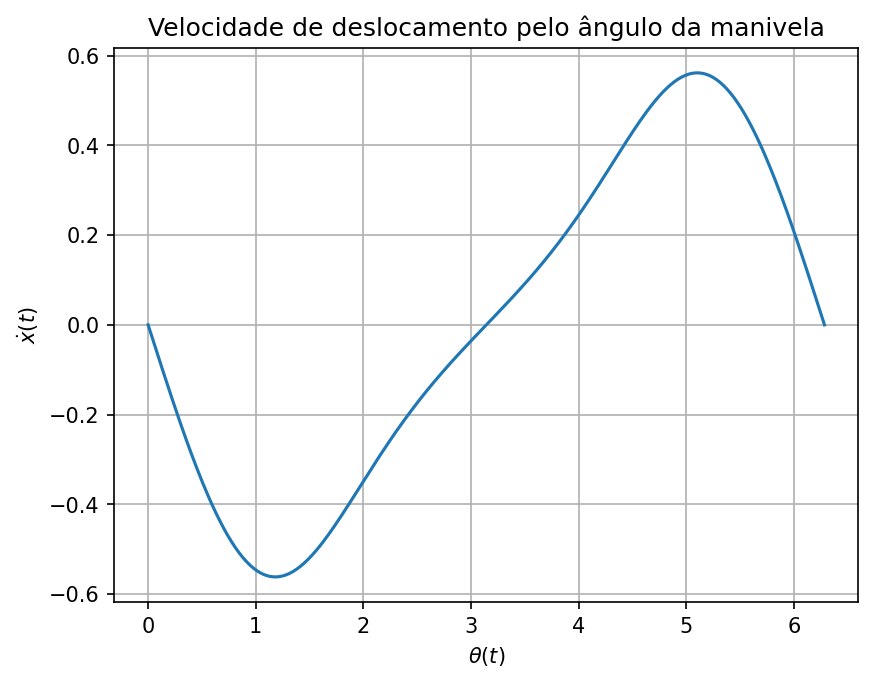

In [66]:
plt.figure(dpi=150)
plt.plot(th_num,vc_num)
plt.title('Velocidade de deslocamento pelo ângulo da manivela')
plt.xlabel(r'$\theta(t)$')
plt.ylabel(r'$\dot{x}(t)$')
plt.grid(True)
plt.show()

In [67]:
from matplotlib import animation, rc
from IPython.display import HTML
constantes = {la:0.05,lb:0.1}
x0 = 0
y0 = 0
x1 = me.dot(pQO,N.x)
x1 = x1.subs(constantes)
y1 = me.dot(pQO,N.y)
y1 = y1.subs(constantes)
x2 = me.dot(x_sol,N.x).subs(constantes)
y2 = 0

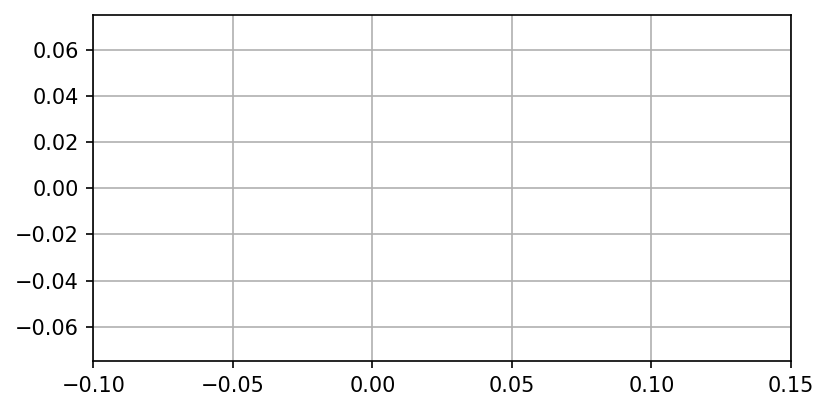

In [68]:
%matplotlib inline
plt.rcParams['figure.figsize']=(6,3)
plt.rcParams['figure.dpi']=150

fig, ax = plt.subplots()

ax.set_xlim(( -0.10, 0.15))
ax.set_ylim((-0.075, 0.075))
ax.grid(True)
line, = ax.plot([], [], 'o-')

def animate(i):
    xp1 = x1.subs(theta,th_num[i])
    xp2 = x2.subs(theta,th_num[i])
    yp1 = y1.subs(theta,th_num[i])
    yp2 = y2
    line.set_data([x0,xp1,xp2],[y0,yp1,yp2])
    return (line,)

def init():
    line.set_data([], [])
    return (line,)

In [69]:
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=360, interval=20, blit=True)
HTML(anim.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available

[Lista de Exercícios 3](Lista_03.ipynb)

[Voltar para o capítulo anterior](Din2.ipynb)     $\qquad$   [Avançar para o próximo capítulo](Din4.ipynb)